In [1]:
import pandas as pd

In [133]:
data = pd.read_csv("C:/Users/sameer.thakare/Downloads/Data - Sheet1.csv")

In [134]:

# loop through all columns in the dataframe
for column in data.columns:
    # check if the column contains objects (i.e., strings)
    if data[column].dtype == 'object':
        # remove commas from the string values in the column
        data[column] = data[column].str.replace(',', '')
        # convert the column to float64 using the to_numeric function
        data[column] = pd.to_numeric(data[column], errors='coerce').fillna(0).astype('float64')

data.dtypes

Year                    int64
customers             float64
S_litres_per_day        int64
litre_per_customer      int64
Ww_Service              int64
ww_per_customer         int64
Sewers_km               int64
water_mains             int64
Ww_litres               int64
Service_reservoirs      int64
Pumping_station         int64
water_treatment         int64
HDI                   float64
Population            float64
win                   float64
spr                   float64
sum                   float64
aut                   float64
dtype: object

In [135]:
import datetime
def year_to_date(year):
    # set the date to January 1st of the given year
    return datetime.datetime(int(year), 1, 1).strftime('%m-%d-%Y')

# replace 'year_column' with the name of your date column
data['Year'] = data['Year'].apply(year_to_date)

In [136]:
import pandas as pd
import numpy as np
import xgboost as xgb

data['Year'] = pd.to_datetime(data['Year'])
data.set_index('Year', inplace=True)

data['change'] = data['S_litres_per_day'].diff()
data['change'] = data['change'].fillna(0)
#data = data.drop(index=data[data['change'] == 0].index)
data

,customers,S_litres_per_day,litre_per_customer,Ww_Service,ww_per_customer,Sewers_km,water_mains,Ww_litres,Service_reservoirs,Pumping_station,water_treatment,HDI,Population,win,spr,sum,aut,change
Year,,,,,,,,,,,,,,,,,,
2016-01-01,825000.0,563,1465,665000,2104,15400,26700,316,370,370,24,0.893,1862137.0,5.35,7.87,14.60,9.56,0.0
2017-01-01,850000.0,570,1491,680000,2000,15800,26800,340,370,335,23,0.893,1870834.0,5.65,9.17,14.04,9.55,7.0
2018-01-01,860000.0,570,1509,700000,2059,15900,26800,340,370,345,23,0.895,1881641.0,3.89,7.91,14.95,9.29,0.0
2019-01-01,875000.0,575,1522,710000,2088,16000,27000,340,370,345,23,0.897,1893667.0,5.97,8.33,14.43,8.95,5.0
2020-01-01,883000.0,585,1509,720000,2028,16000,27000,355,368,346,23,0.902,1895510.0,5.12,8.54,13.98,9.79,10.0
2021-01-01,893000.0,596,1498,727000,1976,16000,27000,368,366,347,23,0.891,1904563.0,4.05,7.50,15.00,10.91,11.0
2022-01-01,900000.0,605,1488,736000,1973,16000,27000,373,366,344,23,0.896,1912000.0,5.79,8.83,14.80,10.72,9.0


In [137]:
df = data

In [138]:
data = data.loc[(data.index < '2022-01-01')]

In [139]:
X = data[['customers', 'litre_per_customer', 'Ww_Service', 'ww_per_customer', 'Sewers_km', 'water_mains ','Ww_litres','Service_reservoirs', 'Pumping_station','water_treatment', 'HDI','Population','win', 'spr', 'sum', 'aut' ]]
y = data['change']

In [142]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=3)

# Fit the model on the data
xgb_model.fit(X, y)

# Define the number of Monte Carlo simulations to run
n_simulations = 250000



n_months = 1

# Generate random values for the predictors for each simulation
predictors = pd.DataFrame({
    'customers': np.random.normal(data['customers'].mean(), data['customers'].std(), size=n_simulations*n_months),
    'litre_per_customer': np.random.normal(data['litre_per_customer'].mean(), data['litre_per_customer'].std(), size=n_simulations*n_months),
    'Ww_Service': np.random.normal(data['Ww_Service'].mean(), data['Ww_Service'].std(), size=n_simulations*n_months),
    'ww_per_customer': np.random.normal(data['ww_per_customer'].mean(), data['ww_per_customer'].std(), size=n_simulations*n_months),
    'Sewers_km': np.random.normal(data['Sewers_km'].mean(), data['Sewers_km'].std(), size=n_simulations*n_months),
    'water_mains ': np.random.normal(data['water_mains '].mean(), data['water_mains '].std(), size=n_simulations*n_months),
    'Ww_litres': np.random.normal(data['Ww_litres'].mean(), data['Ww_litres'].std(), size=n_simulations*n_months),
    'Service_reservoirs': np.random.normal(data['Service_reservoirs'].mean(), data['Service_reservoirs'].std(), size=n_simulations*n_months),
    'Pumping_station': np.random.normal(data['Pumping_station'].mean(), data['Pumping_station'].std(), size=n_simulations*n_months),
    'water_treatment': np.random.normal(data['water_treatment'].mean(), data['water_treatment'].std(), size=n_simulations*n_months),
    'HDI': np.random.normal(data['HDI'].mean(), data['HDI'].std(), size=n_simulations*n_months),
    'Population': np.random.normal(data['Population'].mean(), data['Population'].std(), size=n_simulations*n_months),
    'win': np.random.normal(data['win'].mean(), data['win'].std(), size=n_simulations*n_months),
    'spr': np.random.normal(data['spr'].mean(), data['spr'].std(), size=n_simulations*n_months),
    'sum': np.random.normal(data['sum'].mean(), data['sum'].std(), size=n_simulations*n_months),
    'aut': np.random.normal(data['aut'].mean(), data['aut'].std(), size=n_simulations*n_months)

})

# Predict the change in amount for each simulation
change_sim = xgb_model.predict(predictors).reshape((n_simulations, n_months))

# Create an array to store the results of the Monte Carlo simulations
emp_sim = np.zeros((n_simulations, n_months+1))

# Initialize the first step with the last known value of the number of litres
emp_sim[:, 0] = data['S_litres_per_day'].iloc[-1]

# Calculate the amount of litres for each simulation
for i in range(n_simulations):
    for j in range(1, n_months+1):
        emp_sim[i, j] = emp_sim[i, j-1] + change_sim[i, j-1]

# Calculate the mean and standard deviation of the simulated number of litres after two years
mean_emp = np.mean(emp_sim[:, -1])
std_emp = np.std(emp_sim[:, -1])

# Calculate the 95% confidence interval for the simulated number of litres after two years
ci_emp = (mean_emp - 1.96*std_emp, mean_emp + 1.96*std_emp)

# Print the results
print('Simulated amount of water consumption for year 2022: {:.2f} (95% CI: {:.2f}, {:.2f})'.format(mean_emp, ci_emp[0], ci_emp[1]))
print('The actual value for per day water consumption for year 2022: {}'.format(df.loc['2022-01-01', 'S_litres_per_day']))

Simulated amount of water consumption for year 2022: 601.36 (95% CI: 594.49, 608.24)
The actual value for per day water consumption for year 2022: 605.0


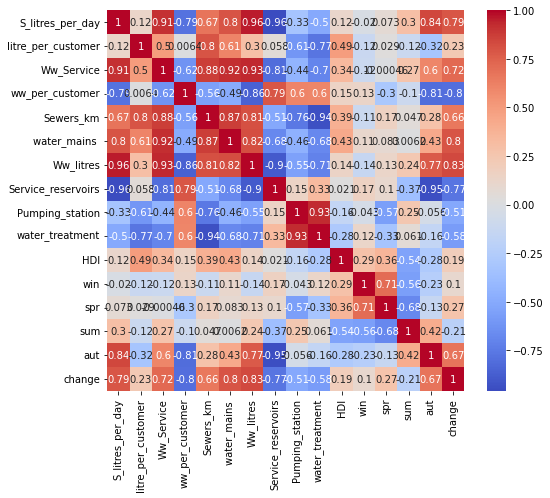

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/sameer.thakare/Downloads/Data - Sheet1.csv")
data = data.drop(columns=['Year'])

corr_matrix = data.corr()
#data.head()
# print the correlation matrix
#print(corr_matrix)
data['change'] = data['S_litres_per_day'].diff()
data['change'] = data['change'].fillna(0)
#sns.heatmap(data.corr());
#data.head()

plt.subplots(figsize=(8, 7))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()